# UNIT 5. Regression

This Unit includes main introduction to linear and non-linear regression, strongly based in {cite:p}`kroese2020`.

```{tableofcontents}
```

```{bibliography}
:style: unsrt
```

## Simple linear regression

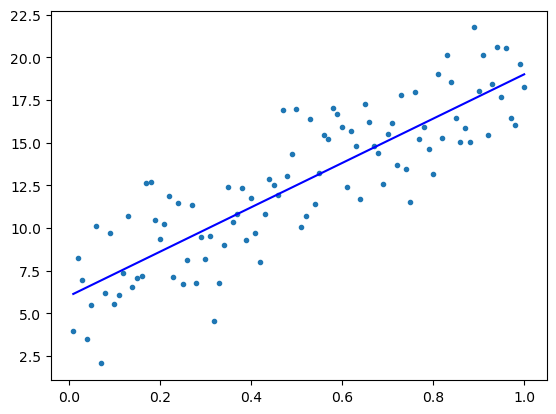

In [93]:
""" confpred.py """
import numpy as np
import matplotlib.pyplot as plt
from  numpy.linalg import inv, lstsq, norm
np.random.seed(123)

n = 100
x = np.linspace(0.01,1,100).reshape((n,1))
# parameters
beta = np.array([6,13])
sigma = 2
Xmat = np.hstack((np.ones((n,1)), x)) #design matrix
y = Xmat @ beta + sigma*np.random.randn(n) 

# solve the normal equations
betahat = lstsq(Xmat, y,rcond=None)[0] 

rl = np.zeros(n)  # (true) regression line
u = 0

for i in range(n):
    u = u + 1/n;
    xvec = np.array([1,u])
    rl[i] = xvec.T @ beta;

plt.plot(x,y, '.')
plt.plot(x,rl,'b')
plt.savefig("../figures/linreg.png")


## <a id='toc1_1_'></a>[Calculation of the Predicted Residual Sum of Squares (PRESS)](#toc0_)

We start by defining that in a *multiple linear regression model* the response $Y$ depends on a $d$-dimensional explanatory vector $\mathbf{x}=[x_1,\ldots,x_d]^T$ via the relationship:
$$Y=\beta_0  + \beta_1 x_1 + \cdots + \beta_d x_d + \varepsilon$$
where $\mathbb{E}\varepsilon=0$ and $\mathbb{Var}\varepsilon =\sigma^2$.

This is true for a given pair $(\mathbf{x},Y)$ of data. If we want to apply it to a whole training set $\mathcal{T}=\{(\mathbf{x_1},Y_1),\ldots,(\mathbf{x_n},Y_n)\}$, we consider a linear model of the form:
$$\mathbf{Y}=\mathbf{X}\mathbf{\beta}+\mathbf{\varepsilon}$$

We return here to the polynomial regression problem that we explored in (Chapter 2)[UNIT2-Statistical-Learning.ipynb]. There, we estimated the generalization risk for various polynomial prediction functions using independent validation data. Here we calculate such generalization risk using cross validation and compute the PRESS using 
$$
\mathrm{PRESS}=\sum_{i=1}^n \left(\frac{e_i}{1-p_i}\right)^2
$$
where $e_i=y_i-\hat{y_i}=y_i-(\mathbf{X}\hat{\mathbf{\beta}})$ is the $i$ th residual and $p_i$ are the diagonal values of the orthogonal projection matrix $\mathbf{X}\mathbf{X}^+$

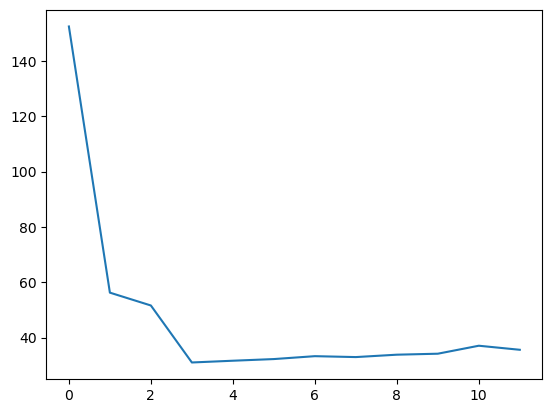

In [94]:
""" polyregpress.py """
import numpy as np
from numpy.random import rand, randn
from numpy.linalg import norm, solve
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

def generate_data(beta , sig, n):
    u = np.random.rand(n, 1)
    y = u ** np.arange(0, 4) @ beta.reshape((4,1)) + sig * np.random.randn(n, 1)
    return u.reshape((n,)), y.reshape((n,))

np.random.seed(12)
beta = np.array([10, -140, 400, -250]);
sig=5; n = 10**2;
u,y = generate_data(beta,sig,n)

K = 12 #maximum number of parameters
press = np.zeros(K)
for k in range(K):
    poly = PolynomialFeatures(k)
    X = poly.fit_transform(u.reshape(-1, 1)) # construct the model matrix
    P = X @ (np.linalg.inv(X.T @ X) @ (X.T)) # hat matrix
    e = y - P @ y

    press[k] = np.mean(np.power(np.divide(e,(1-np.diag(P))),2))

plt.plot(press) 

## Inference for Normal Linear Models

Example on the yield of crop for four different crop treatments (columns) on four different plots (rows)

In [95]:
""" crop.py """
import numpy as np
from scipy.stats import f
from numpy.linalg import lstsq, norm 
 
yy = np.array([9.2988, 9.4978, 9.7604, 10.1025,
      8.2111, 8.3387, 8.5018,  8.1942,
      9.0688, 9.1284, 9.3484,  9.5086,
      8.2552, 7.8999, 8.4859,  8.9485]).reshape(4,4).T
print(yy)


[[ 9.2988  8.2111  9.0688  8.2552]
 [ 9.4978  8.3387  9.1284  7.8999]
 [ 9.7604  8.5018  9.3484  8.4859]
 [10.1025  8.1942  9.5086  8.9485]]


In [96]:
nrow, ncol = yy.shape[0], yy.shape[1]
n = nrow * ncol
y = yy.reshape((16,))
X_1 = np.ones((n,1))


In [97]:

KM = np.kron(np.eye(ncol),np.ones((nrow,1)))
KM[:,0]
X_2 = KM[:,1:ncol]
IM = np.eye(nrow)
C = IM[:,1:nrow]

X_3 = np.vstack((C, C))
X_3 = np.vstack((X_3, C))
X_3 = np.vstack((X_3, C))
 
X = np.hstack((X_1,X_2))
X = np.hstack((X,X_3))

print(X)


[[1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 1.]
 [1. 1. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 1. 0. 0.]
 [1. 1. 0. 0. 0. 1. 0.]
 [1. 1. 0. 0. 0. 0. 1.]
 [1. 0. 1. 0. 0. 0. 0.]
 [1. 0. 1. 0. 1. 0. 0.]
 [1. 0. 1. 0. 0. 1. 0.]
 [1. 0. 1. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 1. 1. 0. 0.]
 [1. 0. 0. 1. 0. 1. 0.]
 [1. 0. 0. 1. 0. 0. 1.]]


In [98]:

p = X.shape[1] #number of parameters in full model
betahat = lstsq(X, y,rcond=None)[0]  #estimate under the full model

ym = X @ betahat

X_12 = np.hstack((X_1, X_2)) #omitting the block effect
k = X_12.shape[1] #number of parameters in reduced model
betahat_12 = lstsq(X_12, y,rcond=None)[0] 
y_12 = X_12 @ betahat_12

T_12=(n-p)/(p-k)*(norm(y-y_12)**2 - 
      norm(y-ym)**2)/norm(y-ym)**2

pval_12 = 1 - f.cdf(T_12,p-k,n-p)

X_13 = np.hstack((X_1, X_3)) #omitting the treatment effect
k = X_13.shape[1] #number of parameters in reduced model
betahat_13 = lstsq(X_13, y,rcond=None)[0]
y_13 = X_13 @ betahat_13
T_13=(n-p)/(p-k)*(norm(y-y_13)**2 - 
      norm(y-ym)**2)/norm(y-ym)**2
pval_13 = 1 - f.cdf(T_13,p-k,n-p)

print(pval_12,pval_13)

2.730857009958232e-05 0.03455786133297134


## Confidence and prediction intervals

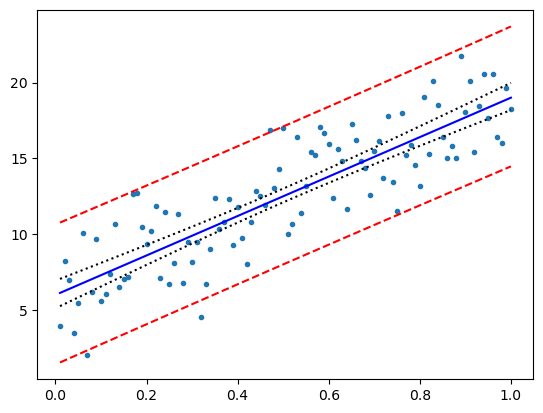

In [99]:
""" confpred.py """
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from  numpy.linalg import inv, lstsq, norm
np.random.seed(123)

n = 100
x = np.linspace(0.01,1,100).reshape((n,1))
# parameters
beta = np.array([6,13])
sigma = 2
Xmat = np.hstack((np.ones((n,1)), x)) #design matrix
y = Xmat @ beta + sigma*np.random.randn(n) 

# solve the normal equations
betahat = lstsq(Xmat, y,rcond=None)[0] 
# estimate for sigma
sqMSE = norm(y - Xmat @ betahat)/np.sqrt(n-2) 

tquant = t.ppf(0.975,n-2) # 0.975 quantile 
#upper/lower conf. limits
ucl = np.zeros(n)
lcl = np.zeros(n)  
upl = np.zeros(n)  
lpl = np.zeros(n)  
rl = np.zeros(n)  # (true) regression line
u = 0

for i in range(n):
    u = u + 1/n;
    xvec = np.array([1,u])
    sqc = np.sqrt(xvec.T @ inv(Xmat.T @ Xmat) @ xvec)
    sqp = np.sqrt(1 + xvec.T @ inv(Xmat.T @ Xmat) @ xvec)
    rl[i] = xvec.T @ beta;
    ucl[i] = xvec.T @ betahat + tquant*sqMSE*sqc;
    lcl[i] = xvec.T @ betahat - tquant*sqMSE*sqc;  
    upl[i] = xvec.T @ betahat + tquant*sqMSE*sqp;
    lpl[i] = xvec.T @ betahat - tquant*sqMSE*sqp;

plt.plot(x,y, '.')
plt.plot(x,rl,'b')
plt.plot(x,ucl,'k:')
plt.plot(x,lcl,'k:')
plt.plot(x,upl,'r--')
plt.plot(x,lpl,'r--') 

Linear models with python `statsmodels`

A simple calculation of the linear model for a bidimensional regression with the ordinary least squares model (`ols`). Case with two quantitative variables:

In [100]:
""" snippets.py """ 
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula .api import ols
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
myData = pd.DataFrame ({'y' : [10 ,9 ,4 ,2 ,4 ,9] ,
'x1' : [7.4 ,1.2 ,3.1 ,4.8 ,2.8 ,6.5] ,
'x2' : [1 ,1 ,2 ,2 ,3 ,3]})
mod = ols("y~x1+x2", data= myData )
mod_matrix = pd.DataFrame (mod.exog , columns =mod. exog_names )
print ( mod_matrix )


   Intercept   x1   x2
0        1.0  7.4  1.0
1        1.0  1.2  1.0
2        1.0  3.1  2.0
3        1.0  4.8  2.0
4        1.0  2.8  3.0
5        1.0  6.5  3.0


In the second example, we treat the student survey dataset, that contains measurements such as weight, height, sex, etc with $n=100$ university students sample.

Let us study the relationaship between the shoe size (explanatory variable) and the height (response variable).

Text(0, 0.5, 'Height')

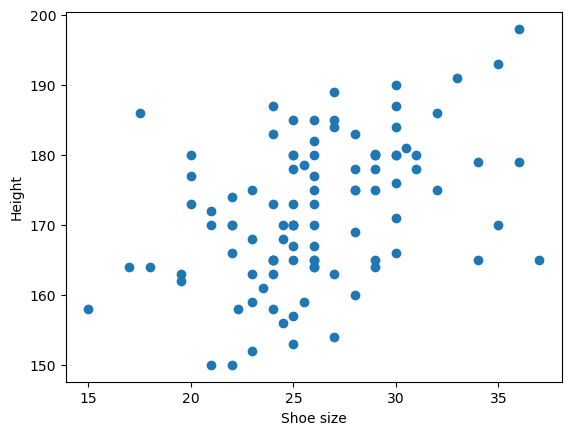

In [101]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
survey = pd.read_csv ('https://raw.githubusercontent.com/DSML-book/Programs/master/Chapter5/survey.csv')
plt.scatter(survey.shoe , survey.height)
plt.xlabel("Shoe size")
plt.ylabel("Height")


Parameter estimation. Let us find $\beta_0$ and $\beta_1$.

In [102]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
model = ols("height~shoe", data=survey ) # define the model
fit = model.fit () #fit the model defined above
b0 , b1 = fit.params
print (fit.params )


Intercept    145.777570
shoe           1.004803
dtype: float64


we will now plot the estimated line on the data:

Text(0, 0.5, 'Height')

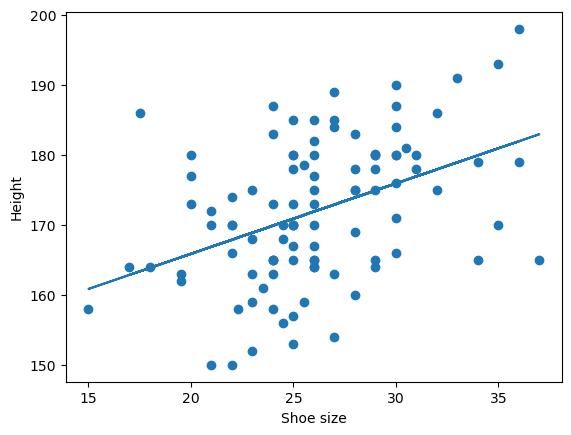

In [103]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
plt.plot(survey.shoe , b0 + b1* survey.shoe)
plt.scatter(survey.shoe ,survey.height)
plt.xlabel("Shoe size")
plt.ylabel("Height")


the summary of the results can be obtained by the `summary` method:
* coef: Estimates of the parameters
* std error: standard deviations of the regression line (suare root of the variances)
* t: Student's t-test statistics associated with the hypotheses $H_0:\beta_i=0$ and $H_1:\beta_i\neq 0$, for $i=0,1$
* $P>|t|$: P-value of the Student's test
* $[0.025,0.975]$: 95\% confidence intervals for the parameters.
* R-squared: coefficient of determination $R^2$ (percentage of variation explained by the regression).
* F-statistic: $F$ statistic associated with testing the full model against the default model.
* AIC: Akaike information criterion 

In [104]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
print (fit.summary ())


                            OLS Regression Results                            
Dep. Variable:                 height   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     21.28
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           1.20e-05
Time:                        08:33:20   Log-Likelihood:                -363.88
No. Observations:                 100   AIC:                             731.8
Df Residuals:                      98   BIC:                             737.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    145.7776      5.763     25.296      0.0

Only 17.8% of the height is explained by the shoe size.

If we check the p-value of the slope we see that it is signifficantly different than zero (small p-value).

In [105]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
dir(fit)
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
fit.pvalues[1]


1.1993996732477541e-05

Now we will add additional features (weight):
$$height=\beta_0 + \beta_1 shoe + \beta_2 weigth + \varepsilon$$

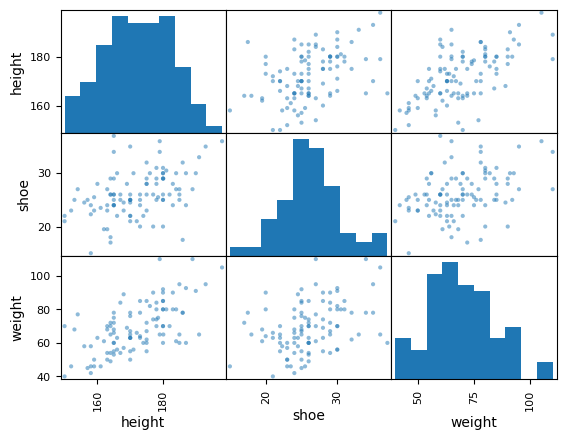

In [106]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
model = ols("height~shoe+weight", data=survey)
fit = model.fit ()
axes = pd.plotting.scatter_matrix(survey[['height','shoe','weight']])
plt.show()


In [107]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 height   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     36.61
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           1.43e-12
Time:                        08:33:21   Log-Likelihood:                -345.58
No. Observations:                 100   AIC:                             697.2
Df Residuals:                      97   BIC:                             705.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    132.2677      5.247     25.207      0.000     121.853     142.682
shoe           0.5304      0.196      2.703      0.008       0.141       0.920
weight         0.3744      0.057      6.546      0.000       0.261       0.488
==============================================================================
Omnibus:                        1.647   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.439   Jarque-Bera (JB):                1.103
Skew:                          -0.133   Prob(JB):                        0.576
Kurtosis:                       3.440   Cond. No.                         508.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The F-statistic is used to test whether the full model (here with two explanatory variables) is better at "explaining" the height than the default model. The P-value obtained says that at least one of the two variables is associated with the height.

In [108]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
table = sm.stats.anova_lm(fit)
print(table)


            df       sum_sq      mean_sq          F        PR(>F)
shoe       1.0  1840.467359  1840.467359  30.371310  2.938651e-07
weight     1.0  2596.275747  2596.275747  42.843626  2.816065e-09
Residual  97.0  5878.091294    60.598879        NaN           NaN


            df       sum_sq      mean_sq          F        PR(>F)
weight     1.0  3993.860167  3993.860167  65.906502  1.503553e-12
shoe       1.0   442.882938   442.882938   7.308434  8.104688e-03
Residual  97.0  5878.091294    60.598879        NaN           NaN


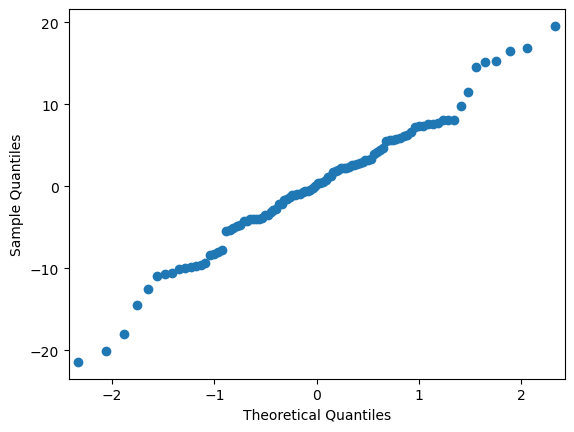

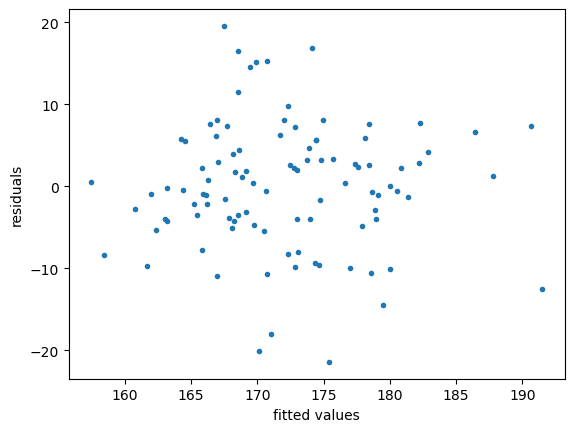

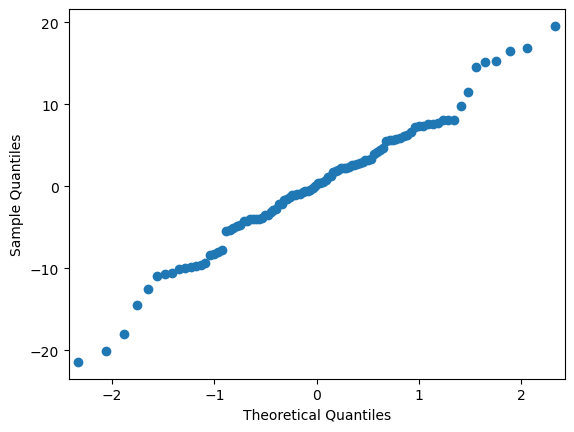

In [109]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
model = ols("height~weight+shoe", data=survey)
fit = model.fit ()
table = sm.stats.anova_lm(fit)
print ( table )
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
x = {'shoe': [30.0] , 'weight': [75.0]} # new input ( dictionary )
pred = fit.get_prediction(x)
pred. summary_frame(alpha =0.05).unstack ()
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
plt.plot(fit.fittedvalues ,fit.resid ,'.')
plt.xlabel ("fitted values")
plt.ylabel ("residuals")


Finallky, we generate a Q-Q plot to [explore](https://www.ucd.ie/ecomodel/Resources/QQplots_WebVersion.html) the normality of the data.

In [ ]:
sm.qqplot (fit.resid)
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%